# Modeling Differential Equations with Julia and [DifferentialEquations.jl](https://docs.sciml.ai/stable/)



DifferentialEquations.jl is a package for Julia that provides a superb suite of high quality implementations for numerical solvers for differential equations problems. We recommend the following videos for a tutorial and more information:

1. [Intro to solving DEs in Julia](https://www.youtube.com/watch?v=KPEqYtEd-zY&feature=youtu.be)
2. [Juia and DifferentialEquations.jl](https://www.youtube.com/watch?v=zJ3R6vOhibA&t=1490s)

In this notebook we will mske use of several Julia packages:

1. [DifferentialEquations.jl](https://docs.sciml.ai/stable/) is the main library for the numerical solution of most any kind of differential equations problem. This package is large but very well-documented and there are tutorial videos and lecture notes that are very helpful to get started using Julia for differential equations. 
2. [ParameterizedFunctions.jl](https://docs.sciml.ai/v1.10/analysis/parameterized_functions.html) makes it easier to express differential equations in notation that is much closer to typical mathematical notation. Furthermore, using parameterized functions helps with optimizing code and is essential for parameter estimation in Julia. 
3. [Latexify.jl](https://korsbo.github.io/Latexify.jl/stable/) provides functions for displaying Julia code in $\LaTeX$.
4. [Plots.jl](http://docs.juliaplots.org/latest/) is plotting library for Julia that provides a common approach to plotting for a large number of backends such as [PyPlot.jl](https://github.com/JuliaPy/PyPlot.jl). 
5. Later in this notebook we also make use of [DynamicalSystems.jl](https://juliadynamics.github.io/DynamicalSystems.jl/v1.3/) which is a library for the modeling and analysis of both discrete and continuous dynamical systems. For continuous dynamical systems DynamicalSystems.jl interfaces with DifferentialEquations.jl. 

To procceed we next load each of these packages. 

In [1]:
# Load necessary packages with using keyword
using DifferentialEquations, ParameterizedFunctions, Latexify, Plots; pyplot();

In order to illustrate the numerical solution of differential equations in Julia, let's use the [Lotka-Volterra](https://en.wikipedia.org/wiki/Lotka%E2%80%93Volterra_equations) equations that model simple predator-prey interactions as a running example. These equations take the following general form:

$\frac{dx}{dt} = \alpha x - \beta x y$

$\frac{dy}{dt} = \gamma xy - \delta y$

where $x(t)$ is the prey population and $y(t)$ is the predator population.  

General a differential equation problem will have the general form

$\frac{du}{dt} = F(u,t)$

where $u$ and $F$ may be vector functions. In order to obtain a unique solution to a differential equation one also requires the specification of an initial value $u_{0} = u(t_{0})$ where the equation is to be solved over a time interval $[t_{0},t_{1}]$. 

Pretty much all implementations for numerical methods for solving differential equations require four pieces of information:

1. Code in the form of a function that describe the differential equation(s). 
2. The specification of values for any and all parameters. 
3. The specification of initial values. 
4. The specification of the time interval over which solutions are to be sought. 

Let's see how each of these parts are done in Julia. 

One way to describe the system

$\frac{dx}{dt} = \alpha x - \beta x y$

$\frac{dy}{dt} = \gamma xy - \delta y$

in Julia code is as follows:

In [49]:
# create function to model right hand side
function lv_f1(du,u,p,t)
    x,y = u # unpack the vector components
    α,β,γ,δ = p # unpack the parameters
    du[1] = α*x - β*x*y
    du[2] = γ*x*y - δ*y
end

lv_f1 (generic function with 1 method)

Now we specify the parameters, initial values, and time interval in Julia. 

In [50]:
# specify parameters and initial conditions
p = (1.5,1.0,3.0,1.0);
u0 = [1.0,1.0];

# specify time interval
tspan = (0.0,10.0);

Next, we put all the four parts of the specification of a differential equations problem together into an ODEProblem:

In [51]:
prob1 = ODEProblem(lv_f1,u0,tspan,p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: [1.0, 1.0]

Finally, we solve our problem. 

In [52]:
sol1 = solve(prob1);

What should we do with the output from the call to the solve function? One option is that we can simply plot out solution: 

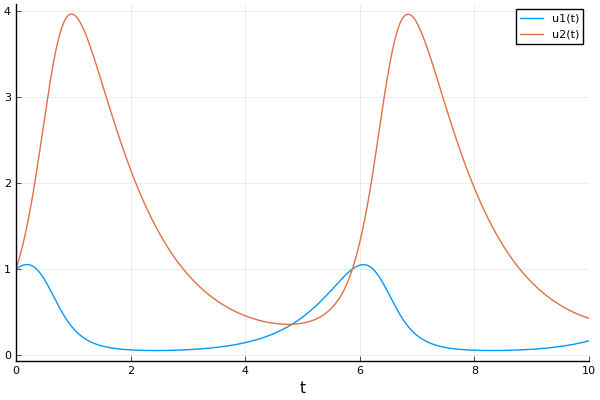

In [53]:
# can just plot the solution
plot(sol1)

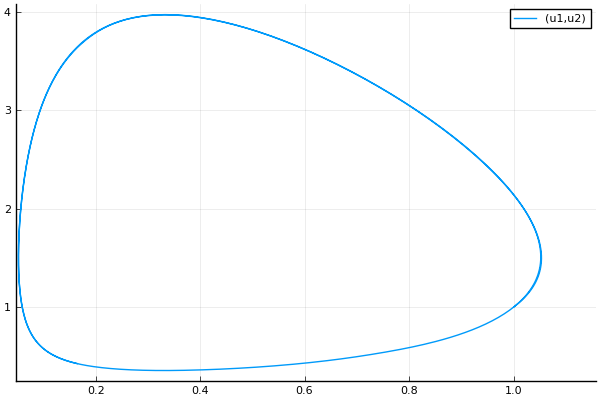

In [54]:
# if we want a phase-plane plot
plt=plot(sol1,vars=(1,2))

It's a good idea to understand what information is contained in the solution object. 

In [55]:
# access time values
sol1.t

25-element Array{Float64,1}:
  0.0                
  0.07544027691131173
  0.21364255647743985
  0.36898743324660477
  0.5610316402696482 
  0.7845503380866679 
  1.0097556174275868 
  1.2983231247063953 
  1.5770570925792562 
  1.96497334462931   
  2.3223268365369014 
  2.7598011040321904 
  3.2892049546723237 
  4.00730372704307   
  4.683044629957971  
  5.460160999124588  
  6.1904092133513595 
  6.657730718030581  
  7.125670990624224  
  7.5965508494336165 
  7.982657269377145  
  8.504946918606274  
  9.041311837127928  
  9.940248252187757  
 10.0                

This accesses the time values from $t_{0}=0$ to $t_{1} = 10$ at which the numerical solver estimated the values of the solutions. That is, these are our time-points. Note that this is a one-dimensional array (a vector). We can also access the values of the numerical solution at these time-points as follows: 

In [56]:
# access solution values
sol1.u

25-element Array{Array{Float64,1},1}:
 [1.0, 1.0]                                
 [1.0321249609481256, 1.1673528333429075]  
 [1.0526497545986224, 1.5694252448048358]  
 [0.9955273719727826, 2.1733169786547224]  
 [0.8057173563581979, 3.0293435864790252]  
 [0.5216538549091523, 3.7781351730813766]  
 [0.3026570443872591, 3.9619863177416623]  
 [0.15527851669494425, 3.5882849160222157] 
 [0.09398388364297039, 3.003136066823378]  
 [0.06129769583821188, 2.2223126845021812] 
 [0.052683757024689803, 1.6506151133108569]
 [0.05550754515607468, 1.142655445761573]  
 [0.07517451192344564, 0.7446498087241797] 
 [0.1454523266646892, 0.4550245783314417]  
 [0.3071308665150126, 0.358095272663854]   
 [0.7225815168565966, 0.515977640881975]   
 [1.0240209771731055, 1.9621104864428613]  
 [0.5208522553855134, 3.7782017174866405]  
 [0.1718737897702483, 3.669447363809328]   
 [0.07719696428523605, 2.692168559822453]  
 [0.05628439294569419, 1.9722267893674603] 
 [0.05350867756904241, 1.2716205191859

Note that this is a one-dimensional array of one-dimensional arrays. If you use a language like MATLAB you might be used to obtaining the numerical solution to differential equations as a matrix. We can get the same thing in Julia as follows:

In [57]:
sol1matrix = convert(Array,sol1)

2×25 Array{Float64,2}:
 1.0  1.03212  1.05265  0.995527  0.805717  …  0.0689802  0.155046  0.165247
 1.0  1.16735  1.56943  2.17332   3.02934      0.818728   0.44039   0.426924

Then we can use this format to make plots such as follows:

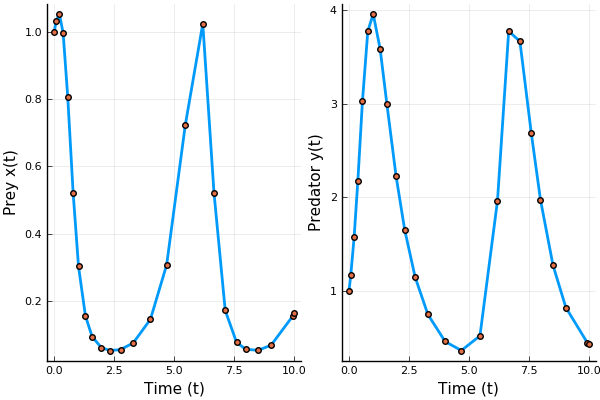

In [58]:
p1 = plot(sol1.t, sol1matrix[1,:],xaxis="Time (t)",yaxis="Prey x(t)",lw=2) # plot prey population as a function of time
p1 = scatter!(sol1.t, sol1matrix[1,:])
p2 = plot(sol1.t, sol1matrix[2,:],xaxis="Time (t)",yaxis="Predator y(t)",lw=2) # plot predator population as a function of time
p2 = scatter!(sol1.t, sol1matrix[2,:])
plot(p1, p2, layout = (1, 2), legend = false)

Notice that this is note as smooth as the previous graph!

### Solutions to Differential Equations are Continuous Functions!

Note that the first two time points for which the numerical solution is obtained are:

In [59]:
# a single time-point
println(sol1.t[1])
println(sol1.t[2])

0.0
0.07544027691131173


Suppose we want the solution value at some time between 0.0 and 0.75, say for example 0.01. This can actually be obtained from our solution object as follows:

In [60]:
sol1(0.01)

2-element Array{Float64,1}:
 1.004911114012157 
 1.0202769076266633

Thus solution output from the solve function allows for continuous interpolation.

We can use this, for example, to obtain a smoother plot. 

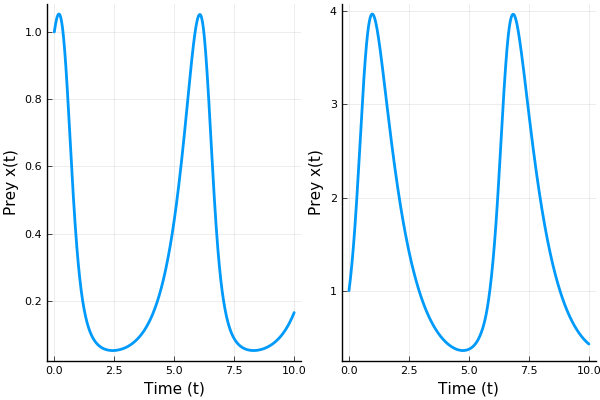

In [61]:
tvals = 0.0:0.01:10.0;
solvals = sol1.(tvals);
solvalsmatrix = hcat(solvals...)';
solvalsmatrix = hcat(tvals,solvalsmatrix);
p1 = plot(solvalsmatrix[:,1], solvalsmatrix[:,2],xaxis="Time (t)",yaxis="Prey x(t)",lw=2) # plot prey population as a function of time
p2 = plot(solvalsmatrix[:,1], solvalsmatrix[:,3],xaxis="Time (t)",yaxis="Prey x(t)",lw=2) # plot prey population as a function of time
plot(p1, p2, layout = (1, 2), legend = false)

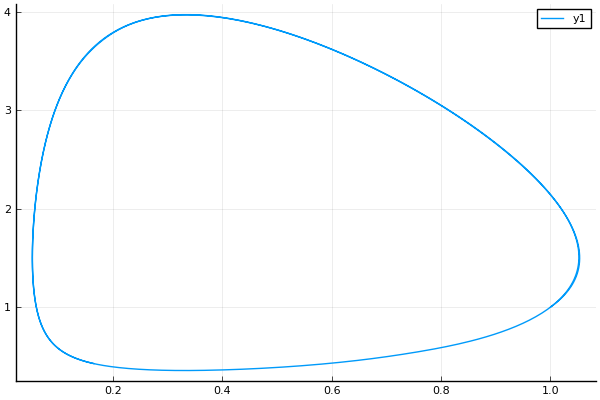

In [62]:
# or if we want a phase-plane plot
plt=plot(solvalsmatrix[:,2],solvalsmatrix[:,3])

Suppose that we want to "fill in" the phase plane with trajectories corresponding to several different initial conditions? We can easily do this as, for example, with:

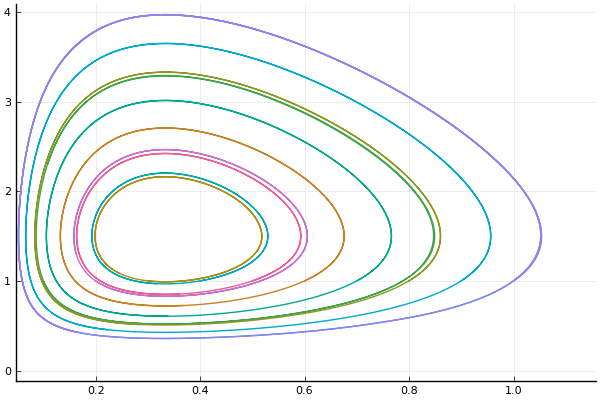

In [63]:
u01 = 0.0:0.1:1.0;
u02 = ones(length(u01))
u0M = [u01 u02];

n = size(u0M)[1];
for i = 1:n
    u0 = u0M[i,:];
    prob = ODEProblem(lv_f1,u0,tspan,p);
    sol = solve(prob);
    plt=plot!(sol,vars=(1,2))
end

plt = plot!(legend=false)

### Using Parameterized Functions

This provides another way to express the differential equation in Julia code to provide to a numerical solver. 

In [64]:
# here right hand side is specified as a parameterized function
predatorprey! = @ode_def PredatorPrey begin
  dx = α*x - β*x*y
  dy = γ*x*y - δ*y
end α β γ δ



(::PredatorPrey{var"###ParameterizedDiffEqFunction#566",var"###ParameterizedTGradFunction#567",var"###ParameterizedJacobianFunction#568",Nothing,Nothing,ModelingToolkit.ODESystem}) (generic function with 1 method)

We can obtain the $\LaTeX$ expression of a parameterized function!

In [65]:
latexify(predatorprey!)

L"$\begin{align}
\frac{dx(t)}{dt} =& \alpha \mathrm{x}\left( t \right) - \beta \mathrm{x}\left( t \right) \mathrm{y}\left( t \right) \\
\frac{dy(t)}{dt} =& \gamma \mathrm{x}\left( t \right) \mathrm{y}\left( t \right) - \delta \mathrm{y}\left( t \right)
\end{align}
$"

Now let's solve this system again. 

In [66]:
p = (1.5,1.0,3.0,1.0); # parameters
u0 = [1., 1.]; # initial conditions
tspan = (0., 10.); # time interval 
prob = ODEProblem(predatorprey!, u0, tspan, p);
sol = solve(prob);

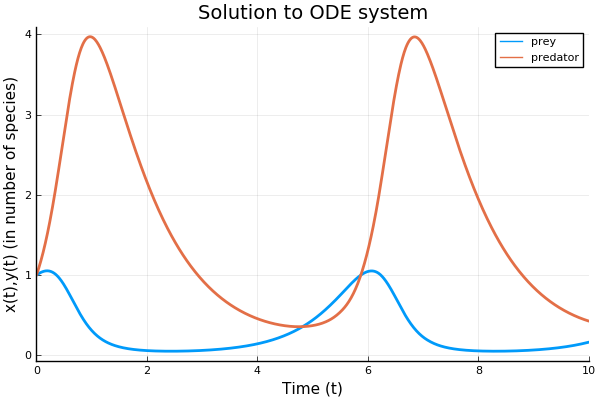

In [67]:
plot(sol,linewidth=2,title="Solution to ODE system",
xaxis="Time (t)",yaxis="x(t),y(t) (in number of species)",label=["prey" "predator"])

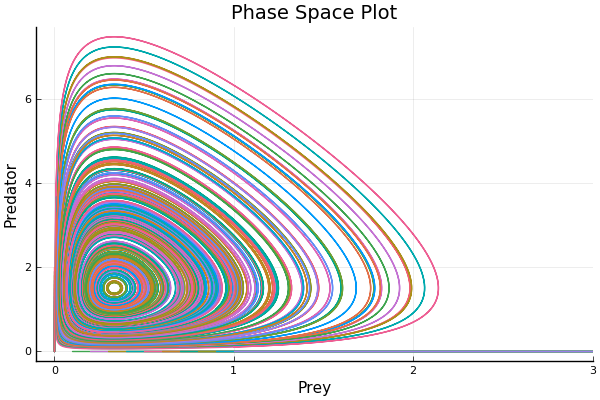

In [68]:
p = plot(sol,vars = (1,2), xlims = (-0.1,3), title = "Phase Space Plot", xaxis = "Prey", yaxis = "Predator", leg=false)
function phase_plot(prob, u0, parms, p, tspan=10.0)
    _prob = ODEProblem(prob.f,u0,(0.0,tspan),parms)
    sol = solve(_prob,Vern9()) # Use Vern9 solver for higher accuracy
    plot!(p,sol,vars = (1,2), xlims = nothing, ylims = nothing)
end
for i in 0.:0.1:2.0
    for j in 0.:0.1:1.0
        phase_plot(prob, [j,i],[1.5,1.0,3.0,1.0],p)
    end
end
plot(p,xlims = (-0.1,3))

### Another Approach Using [DynamicalSystems.jl](https://juliadynamics.github.io/DynamicalSystems.jl/latest/)

In [69]:
using DynamicalSystems

In [70]:
# create function to model right hand side
function ppsys!(du,u,p,t)
    x,y = u
    α,β,γ,δ = p
    du[1] = α*x - β*x*y
    du[2] = γ*x*y - δ*y
    return nothing
end

ppsys! (generic function with 1 method)

In [71]:
p = (1.5,1.0,3.0,1.0);
u0 = [1.0,1.0];
hh = ContinuousDynamicalSystem(ppsys!,u0,p);

In [59]:
tr = trajectory(hh,10.0,dt=0.01)

2-dimensional Dataset{Float64} with 1001 points
 1.0       1.0     
 1.00491   1.02028 
 1.00964   1.04112 
 1.01417   1.06253 
 1.01851   1.08452 
 1.02263   1.10712 
 1.02654   1.13032 
 1.03022   1.15413 
 1.03367   1.17858 
 1.03686   1.20366 
 1.03981   1.22939 
 1.04249   1.25577 
 1.0449    1.28282 
 ⋮                 
 0.147148  0.452375
 0.1487    0.449866
 0.150271  0.447392
 0.151863  0.444952
 0.153476  0.442547
 0.155109  0.440176
 0.156764  0.43784 
 0.15844   0.435538
 0.160137  0.433269
 0.161856  0.431035
 0.163597  0.428835
 0.165361  0.426668

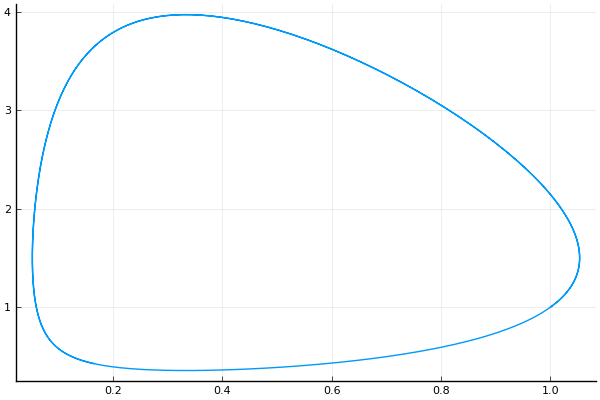

In [60]:
plot(tr[:,1],tr[:,2],legend=false)